In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


1. Dropping 'instant' column as it is redundant.
2. Formatting  the 'dteday' column to datetime for model to get better understanding of it.

In [4]:
bikes = bikes.drop('instant', axis=1)

bikes['dteday'] = pd.to_datetime(bikes['dteday'])
bikes['dteday'] = bikes['dteday'].map(dt.datetime.toordinal)

In [5]:
bikes.shape

(730, 15)

In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


Converting the 'season' column values to their original categories.
Converting 'weathersit' column values to their original meaning to better understand its impact on target variable.

In [7]:
bikes['season'] = bikes['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bikes['weathersit'] = bikes['weathersit'].replace({1:'Clear_Partly_cloudy', 2:'Mist_Cloudy', 3:'Light_Snow_Light_Rain', 4:'Heavy_Rain'})

bikes.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,736695,spring,0,1,0,1,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,736726,spring,0,1,0,2,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,736754,spring,0,1,0,3,1,Clear_Partly_cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,736785,spring,0,1,0,4,1,Clear_Partly_cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,736815,spring,0,1,0,5,1,Clear_Partly_cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


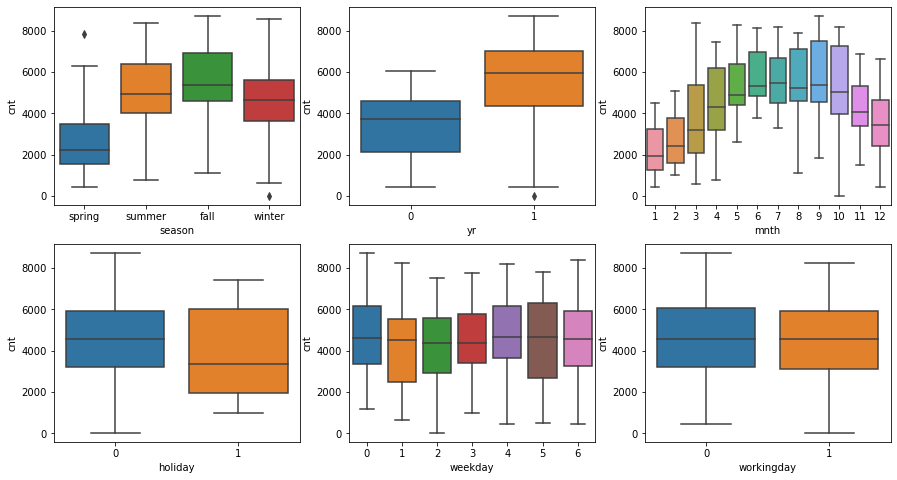

In [8]:
plt.figure(figsize = (15, 8))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)

plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)

plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)

plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)

plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)

plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)

plt.show()

1. September month have greater number of rentals.
2. On average holidays have more rentals.
3. Pretty much every weekday have same average rentals.
4. Fall and summer have more rentals compared to others.
5. Year 2019 is seen having more rentals with an outlier.
6. Non-working day is only slightly better in rental count, otherwise same.

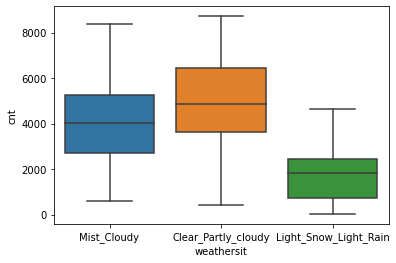

In [9]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

Clearly, people like to rent bikes on either cloudy days or clear days.

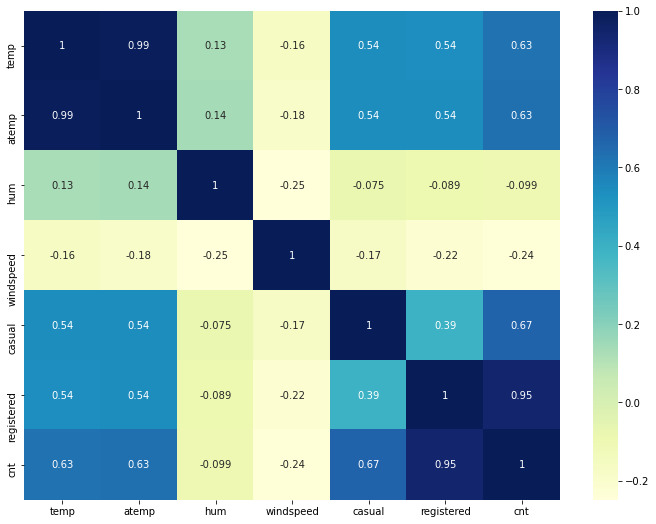

In [10]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']

plt.figure(figsize = (12,9))
sns.heatmap(bikes[num_vars].corr(), annot = True, cmap = "YlGnBu")
plt.show()

1. Not much to say, but collinearity can be seen among some variables clearly.
2. Temp and atemp having good correlation with the cnt.

## Preparing the data for modeling

Now we will make dummy variables for the season and weathersit columns using get_dummies() from pandas.

In [11]:
status = pd.get_dummies(bikes.weathersit, drop_first = True)
bikes = pd.concat([bikes, status], axis = 1)

status = pd.get_dummies(bikes.season, drop_first = True)
bikes = pd.concat([bikes, status], axis = 1)

bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Light_Snow_Light_Rain,Mist_Cloudy,spring,summer,winter
0,736695,spring,0,1,0,1,1,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,736726,spring,0,1,0,2,1,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,736754,spring,0,1,0,3,1,Clear_Partly_cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,736785,spring,0,1,0,4,1,Clear_Partly_cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,736815,spring,0,1,0,5,1,Clear_Partly_cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [12]:
bikes.drop(['season', 'weathersit'], axis = 1, inplace = True)
bikes.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Light_Snow_Light_Rain,Mist_Cloudy,spring,summer,winter
0,736695,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,736726,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,736754,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,736785,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,736815,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [13]:
# Dropping the 'casual' and 'registered' columns as they are already counted in target variable

cols = ['casual', 'registered']

bikes.drop(cols, axis = 1, inplace = True)

bikes.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light_Snow_Light_Rain,Mist_Cloudy,spring,summer,winter
0,736695,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0
1,736726,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0
2,736754,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0
3,736785,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0
4,736815,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0


## Splitting data into train and test sets

In [14]:
import sklearn
from sklearn.model_selection import train_test_split

In [15]:
train, test = train_test_split(bikes, train_size = 0.7, random_state = 100)

print(train.shape)
print(test.shape)

(510, 16)
(220, 16)


### Rescaling the features for the model

We will use Normalisation over standardisation since most of the values in the dataset have range near to (0,1).

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [17]:
# Applying the scaler() to only numeric variables, not the categorical or dummies.

num_vars = ['temp', 'atemp', 'hum', 'windspeed']

train[num_vars] = scaler.fit_transform(train[num_vars])
train.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light_Snow_Light_Rain,Mist_Cloudy,spring,summer,winter
576,737271,1,7,0,3,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,0,0
426,737121,1,3,0,0,0,0.442393,0.438975,0.640189,0.255342,4066,0,1,1,0,0
728,737423,1,12,0,1,1,0.245101,0.200348,0.498067,0.663106,1796,0,0,1,0,0
482,737177,1,4,0,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,1,0
111,736806,0,4,0,0,0,0.345824,0.318819,0.751824,0.380981,1683,0,1,0,1,0


## Model Building
We will be using stats model for model building and RFE from sklearn for feature selection.

In [18]:
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [19]:
y_train = train.pop('cnt')
X_train = train

In [20]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [21]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('dteday', False, 6),
 ('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 4),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light_Snow_Light_Rain', True, 1),
 ('Mist_Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [22]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Light_Snow_Light_Rain',
       'Mist_Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

### Building model using statsmodel for detailed statistic

In [23]:
# Creating X_test df with RFE selected variables

X_train_rfe = X_train[col]

In [24]:
# Adding constant variable to the dataset

X_train_rfe = sm.add_constant(X_train_rfe)

In [25]:
# Linear Regression model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Tue, 18 May 2021   Prob (F-statistic):          8.27e-183
Time:                        00:57:59   Log-Likelihood:                -4139.8
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     499   BIC:                             8348.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2570.4553    309.199      8.313      0.000    1962.964    3177.947
yr                     2005.3143     73.790     27.176      0.000    1860.336    2150.292
holiday                -747.3023    231.802     -3.224      0.001   -1202.731    -291.874
temp                   4311.2115    301.143     14.316      0.000    3719.548    4902.875
hum                   -1221.8835    340.369     -3.590      0.000   -1890.616    -553.151
windspeed             -1590.4542    233.825     -6.802      0.000   -2049.858   -1131.050
Light_Snow_Light_Rain -2082.5440    239.341     -8.701      0.000   -2552.784   -1612.304
Mist_Cloudy            -453.6431     95.285     -4.761      0.000    -640.853    -266.433
spring                 -650.7113    180.437     -3.606      0.000   -1005.221    -296.202
summer                  375.1288    120.970      3.101      0.002     137.454     612.803
winter                  757.0150    148.137      5.110      0.000     465.966    1048.064
==============================================================================
Omnibus:                       63.872   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.401
Skew:                          -0.644   Prob(JB):                     2.43e-35
Kurtosis:                       5.417   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Above is the model summary.<br>
We can see that the model gives a r-squared value of 0.82 which is quite decent to have.<br>
Also the significance values of the predictors are also less than what we want (0.05).

Now, we will calculate the VIF for all variables we have in order to check the collinearity.

In [27]:
# VIF Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,const,72.53
8,spring,4.55
3,temp,3.50
10,winter,3.10
9,summer,2.07
4,hum,1.87
7,Mist_Cloudy,1.56
6,Light_Snow_Light_Rain,1.24
5,windspeed,1.19
1,yr,1.03


No variable is having value of VIF greater than 5.<br>
Hence, there is less colinearity between the variables.

## Residual Analysis

In [28]:
y_train_pred = lm.predict(X_train_rfe)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

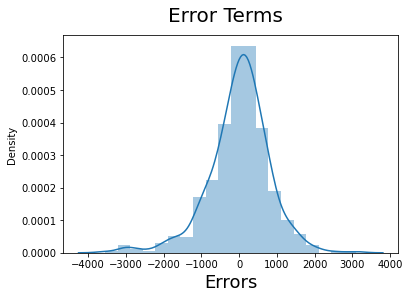

In [30]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms can be seen having a normal form.

In [31]:
# Making Predictions

# Applying the scaler() to only numeric variables, not the categorical or dummies.

num_vars = ['temp', 'atemp', 'hum', 'windspeed']

test[num_vars] = scaler.transform(test[num_vars])
test.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light_Snow_Light_Rain,Mist_Cloudy,spring,summer,winter
184,736791,0,7,1,3,0,0.831783,0.769660,0.657364,0.084219,6043,0,1,0,0,0
535,737230,1,6,0,4,1,0.901354,0.842587,0.610133,0.153728,6211,0,0,0,1,0
299,736994,0,10,0,6,0,0.511964,0.496145,0.837699,0.334206,2659,0,1,0,0,1
221,736975,0,8,0,5,1,0.881625,0.795343,0.437098,0.339570,4780,0,0,0,0,0
152,736731,0,6,0,6,0,0.817246,0.741471,0.314298,0.537414,4968,0,0,0,1,0


In [32]:
# Dividing into X_test and y_test

y_test = test.pop('cnt')
X_test = test

In [33]:
X_test_rfe = X_test[col]

X_test_rfe = sm.add_constant(X_test_rfe)

In [34]:
y_pred = lm.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

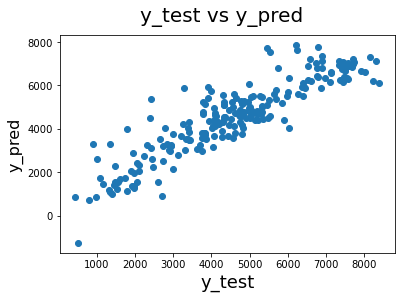

In [35]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Finally we can say that the model we build, have r-squared value of 82%, which means the features we selected using RFE, together explains the 82% variance in the target variable.